Package Loading + Basic DF manipulations and storage

In [162]:
# Predictive Model for Los Angeles Dodgers Promotion and Attendance (Python)

# BASED ON EXHIBIT 2.1 FROM MILLER (2015)

# import packages for analysis and modeling
import pandas as pd  # data frame operations

import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING
%config IPCompleter.greedy=True

#read in data
dodgers = pd.read_csv("C:/Users/jdine/Desktop/SYracuse/Term 5 - Current/Advanced Info Analytics- IST 718/Week 2/dodgers.csv")

# attendance in thousands for plotting 
dodgers['attend_000'] = dodgers['attend']/1000

# print the first five rows of the data frame
print(pd.DataFrame.head(dodgers))
dodgerDF = pd.DataFrame(dodgers)

mondays = dodgers[dodgers['day_of_week'] == 'Monday']
tuesdays = dodgers[dodgers['day_of_week'] == 'Tuesday']
wednesdays = dodgers[dodgers['day_of_week'] == 'Wednesday']
thursdays = dodgers[dodgers['day_of_week'] == 'Thursday']
fridays = dodgers[dodgers['day_of_week'] == 'Friday']
saturdays = dodgers[dodgers['day_of_week'] == 'Saturday']
sundays = dodgers[dodgers['day_of_week'] == 'Sunday']

# convert days' attendance into list of vectors for box plot
data = [[mondays['attend_000'], tuesdays['attend_000'], wednesdays['attend_000'],
         thursdays['attend_000'], fridays['attend_000'], saturdays['attend_000'], sundays['attend_000']]]

ordered_day_names = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

ordered_team_names = (sorted(set(dodgers['opponent']), reverse = True))


  month  day  attend day_of_week opponent  temp   skies day_night cap shirt  \
0   APR   10   56000     Tuesday  Pirates    67  Clear        Day  NO    NO   
1   APR   11   29729   Wednesday  Pirates    58  Cloudy     Night  NO    NO   
2   APR   12   28328    Thursday  Pirates    57  Cloudy     Night  NO    NO   
3   APR   13   31601      Friday   Padres    54  Cloudy     Night  NO    NO   
4   APR   14   46549    Saturday   Padres    57  Cloudy     Night  NO    NO   

  fireworks bobblehead  attend_000  
0        NO         NO      56.000  
1        NO         NO      29.729  
2        NO         NO      28.328  
3       YES         NO      31.601  
4        NO         NO      46.549  


Some Basic Summary Statistics

Minimum attendance is 24312
Maximum attendance is 56000
Average attendance is 41040.0


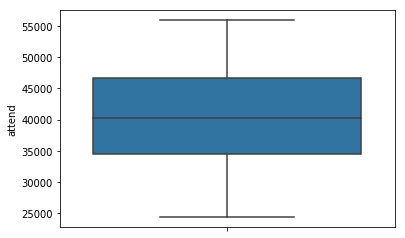

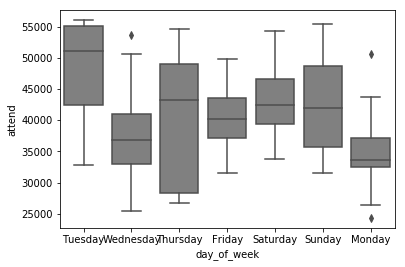

81
81
81
81
324


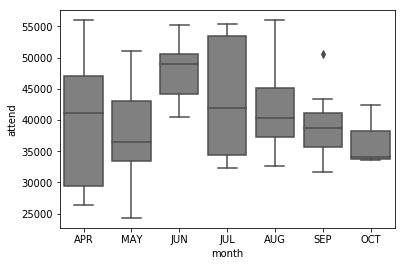

In [67]:
print("Minimum attendance is" + " " +  str(np.min(dodgers['attend'])))
print("Maximum attendance is" + " " +  str(np.max(dodgers['attend'])))
print("Average attendance is" + " " +  str(np.round(np.mean(dodgers['attend']))))

plt.scatter(attend, opponent)


#simple box plot for attendance
sns.boxplot(y = "attend", data=dodgers)
plt.show()

sns.boxplot(x= "day_of_week", y= "attend", data=dodgers, color="grey")
plt.show()

# NUMBER OF PROMOTIONS - ONLY WORKS WITH BINARY VARIABLES
#cap.shirt.fireworks.bobble
cap = np.count_nonzero(dodgers['cap'])
print(cap)
shirt = np.count_nonzero(dodgers['shirt'])
print(shirt)
fireworks = np.count_nonzero(dodgers['fireworks'])
print(fireworks)
bobble = np.count_nonzero(dodgers['bobblehead'])
print(bobble)

#total promotion counts
print(cap+shirt+fireworks+bobble)

#boxplot of attendance by month
sns.boxplot(x="month", y="attend", data=dodgers, color="grey")
plt.show()

# exploratory data analysis: box plot for day of the week


C:\Users\jdine\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


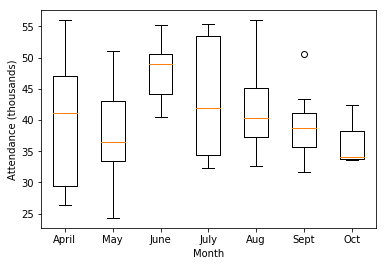

In [79]:
april = dodgers[dodgers['month'] == 'APR']
may = dodgers[dodgers['month'] == 'MAY']
june = dodgers[dodgers['month'] == 'JUN']
july = dodgers[dodgers['month'] == 'JUL']
august = dodgers[dodgers['month'] == 'AUG']
september = dodgers[dodgers['month'] == 'SEP']
october = dodgers[dodgers['month'] == 'OCT']

data = [april['attend_000'], may['attend_000'], 
    june['attend_000'], july['attend_000'], 
    august['attend_000'], september['attend_000'], 
    october['attend_000']]
ordered_month_names = ['April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct']

fig, axis = plt.subplots()
axis.set_xlabel('Month')
axis.set_ylabel('Attendance (thousands)')
day_plot = plt.boxplot(data, sym='o', vert=1, whis=1.5)
plt.setp(day_plot['boxes'], color = 'black')    
plt.setp(day_plot['whiskers'], color = 'black')    
plt.setp(day_plot['fliers'], color = 'black', marker = 'o')
axis.set_xticklabels(ordered_month_names)
plt.show()

## CODE TO SAVE IMAGE FILE
# plt.savefig('fig_advert_promo_dodgers_eda_month_Python.pdf', 
#    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
#    orientation='portrait', papertype=None, format=None, 
#    transparent=True, pad_inches=0.25, frameon=None)  


# trellis/lattice plot attendance by temp, conditioning on skies and day_night with bobblehead NO/YES shown in distinct colors

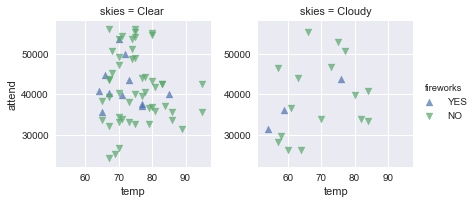

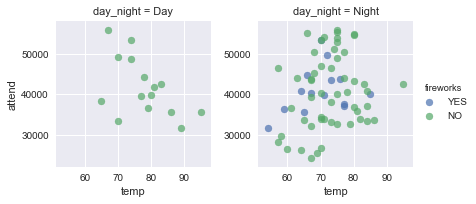

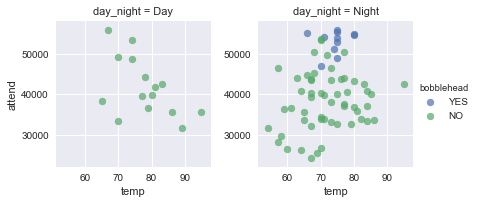

In [80]:
import seaborn as sns

sns.set(style="darkgrid")

g = sns.FacetGrid(dodgers, col="skies", hue="fireworks", 
                  hue_order=["YES", "NO"],
                  hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "temp", "attend", alpha=.7)
g.add_legend();
plt.show()

g = sns.FacetGrid(dodgers, col="day_night", hue="fireworks",
                hue_order=["YES", "NO"],)
g.map(plt.scatter, "temp", "attend", alpha=.7)
g.add_legend();
plt.show()

g = sns.FacetGrid(dodgers, col="day_night", hue="bobblehead",
                hue_order=["YES", "NO"],)
g.map(plt.scatter, "temp", "attend", alpha=.7)
g.add_legend();
plt.show()

# DODGER PROMOTIONS BY TYPE

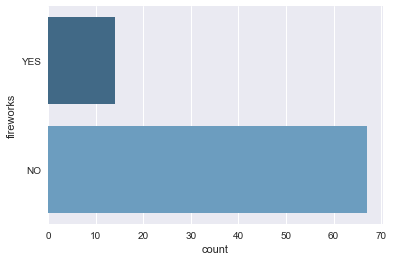

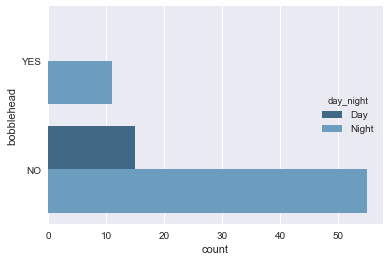

In [82]:
sns.countplot(y="fireworks", data=dodgers, palette="Blues_d",
             order=["YES", "NO"])
g.add_legend();
plt.show()

sns.countplot(y="bobblehead", hue="day_night",
                data=dodgers, palette="Blues_d",
                order=["YES", "NO"])
#g.add_legend();
plt.show()

# BLOCK FOR ORDERING DATA


In [187]:

# map day_of_week to ordered_day_of_week 
day_to_ordered_day = {'Monday' : '1Monday', 
    'Tuesday' : '2Tuesday', 
    'Wednesday' : '3Wednesday', 
    'Thursday' : '4Thursday', 
    'Friday' : '5Friday',
    'Saturday' : '6Saturday',
    'Sunday' : '7Sunday'}
dodgers['ordered_day_of_week'] = dodgers['day_of_week'].map(day_to_ordered_day)   

# map month to ordered_month
month_to_ordered_month = {'APR' : '1April', 
     'MAY' : '2May', 
     'JUN' : '3June', 
     'JUL' : '4July', 
     'AUG' : '5Aug',
     'SEP' : '6Sept',
     'OCT' : '7Oct'}
dodgers['ordered_month'] = dodgers['month'].map(month_to_ordered_month)    


# employ training-and-test regimen for model validation


In [89]:
np.random.seed(1234)
dodgers['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(dodgers))
dodgers_train = dodgers[dodgers['runiform'] >= 0.33]
dodgers_test = dodgers[dodgers['runiform'] < 0.33]
# check training data frame
print('\ndodgers_train data frame (rows, columns): ',dodgers_train.shape)
print(dodgers_train.head())
# check test data frame
print('\ndodgers_test data frame (rows, columns): ',dodgers_test.shape)
print(dodgers_test.head())

# specify a simple model with bobblehead entered last
my_model = str('attend ~ ordered_month + ordered_day_of_week + bobblehead')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = dodgers_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
dodgers_train['predict_attend'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
dodgers_test['predict_attend'] = train_model_fit.predict(dodgers_test)



dodgers_train data frame (rows, columns):  (57, 16)
  month  day  attend day_of_week opponent  temp   skies day_night cap shirt  \
1   APR   11   29729   Wednesday  Pirates    58  Cloudy     Night  NO    NO   
2   APR   12   28328    Thursday  Pirates    57  Cloudy     Night  NO    NO   
3   APR   13   31601      Friday   Padres    54  Cloudy     Night  NO    NO   
4   APR   14   46549    Saturday   Padres    57  Cloudy     Night  NO    NO   
7   APR   24   44014     Tuesday   Braves    63  Cloudy     Night  NO    NO   

  fireworks bobblehead  attend_000 ordered_day_of_week ordered_month  runiform  
1        NO         NO      29.729          3Wednesday        1April  0.622109  
2        NO         NO      28.328           4Thursday        1April  0.437728  
3       YES         NO      31.601             5Friday        1April  0.785359  
4        NO         NO      46.549           6Saturday        1April  0.779976  
7        NO         NO      44.014            2Tuesday        1Apri

C:\Users\jdine\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jdine\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [90]:
# compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(dodgers_test['attend'].corr(dodgers_test['predict_attend']),2),3))

# use the full data set to obtain an estimate of the increase in
# attendance due to bobbleheads, controlling for other factors 
my_model_fit = smf.ols(my_model, data = dodgers).fit()
print(my_model_fit.summary())

print('\nEstimated Effect of Bobblehead Promotion on Attendance: ',\
    round(my_model_fit.params[13],0))
    
# Suggestions for the student: Reproduce the figures in this chapter
# using matplotlib, ggplot, and/or rpy2 calls to R graphics. 
# Examine regression diagnostics for the fitted model.
# Examine other linear predictors and other explanatory variables.
# See if you can improve upon the model with variable transformations. 


Proportion of Test Set Variance Accounted for:  0.217
                            OLS Regression Results                            
Dep. Variable:                 attend   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     6.158
Date:                Mon, 22 Jan 2018   Prob (F-statistic):           2.08e-07
Time:                        21:00:11   Log-Likelihood:                -813.52
No. Observations:                  81   AIC:                             1655.
Df Residuals:                      67   BIC:                             1689.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [188]:
my_model_fit.params

Intercept                            33909.162113
ordered_month[T.2May]                -2385.624809
ordered_month[T.3June]                7163.233601
ordered_month[T.4July]                2849.828120
ordered_month[T.5Aug]                 2377.924344
ordered_month[T.6Sept]                  29.030156
ordered_month[T.7Oct]                 -662.667737
ordered_day_of_week[T.2Tuesday]       7911.493625
ordered_day_of_week[T.3Wednesday]     2460.023247
ordered_day_of_week[T.4Thursday]       775.363844
ordered_day_of_week[T.5Friday]        4883.818330
ordered_day_of_week[T.6Saturday]      6372.055812
ordered_day_of_week[T.7Sunday]        6724.002654
bobblehead[T.YES]                    10714.903460
dtype: float64

In [148]:
#This is your opportunity to get hands on the keyboard and start exploring the data yourself. Using Python and the data provided, create at least one new graphic and one new model that improves upon the model  presented in the lecture – please upload your ipynb file upon completion.

##adding in fireworks
np.random.seed(1234)
dodgers['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(dodgers))
dodgers_train = dodgers[dodgers['runiform'] >= 0.33]
dodgers_test = dodgers[dodgers['runiform'] < 0.33]
# check training data frame
print('\ndodgers_train data frame (rows, columns): ',dodgers_train.shape)
print(dodgers_train.head())
# check test data frame
print('\ndodgers_test data frame (rows, columns): ',dodgers_test.shape)
print(dodgers_test.head())

# specify a simple model with bobblehead entered last
my_model = str('attend ~ ordered_month + ordered_day_of_week + bobblehead +fireworks ')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = dodgers_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
dodgers_train['predict_attend'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
dodgers_test['predict_attend'] = train_model_fit.predict(dodgers_test)




dodgers_train data frame (rows, columns):  (57, 16)
  month  day  attend day_of_week opponent  temp   skies day_night cap shirt  \
1   APR   11   29729   Wednesday  Pirates    58  Cloudy     Night  NO    NO   
2   APR   12   28328    Thursday  Pirates    57  Cloudy     Night  NO    NO   
3   APR   13   31601      Friday   Padres    54  Cloudy     Night  NO    NO   
4   APR   14   46549    Saturday   Padres    57  Cloudy     Night  NO    NO   
7   APR   24   44014     Tuesday   Braves    63  Cloudy     Night  NO    NO   

  fireworks bobblehead  attend_000 ordered_day_of_week ordered_month  runiform  
1        NO         NO      29.729          3Wednesday        1April  0.622109  
2        NO         NO      28.328           4Thursday        1April  0.437728  
3       YES         NO      31.601             5Friday        1April  0.785359  
4        NO         NO      46.549           6Saturday        1April  0.779976  
7        NO         NO      44.014            2Tuesday        1Apri

C:\Users\jdine\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jdine\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


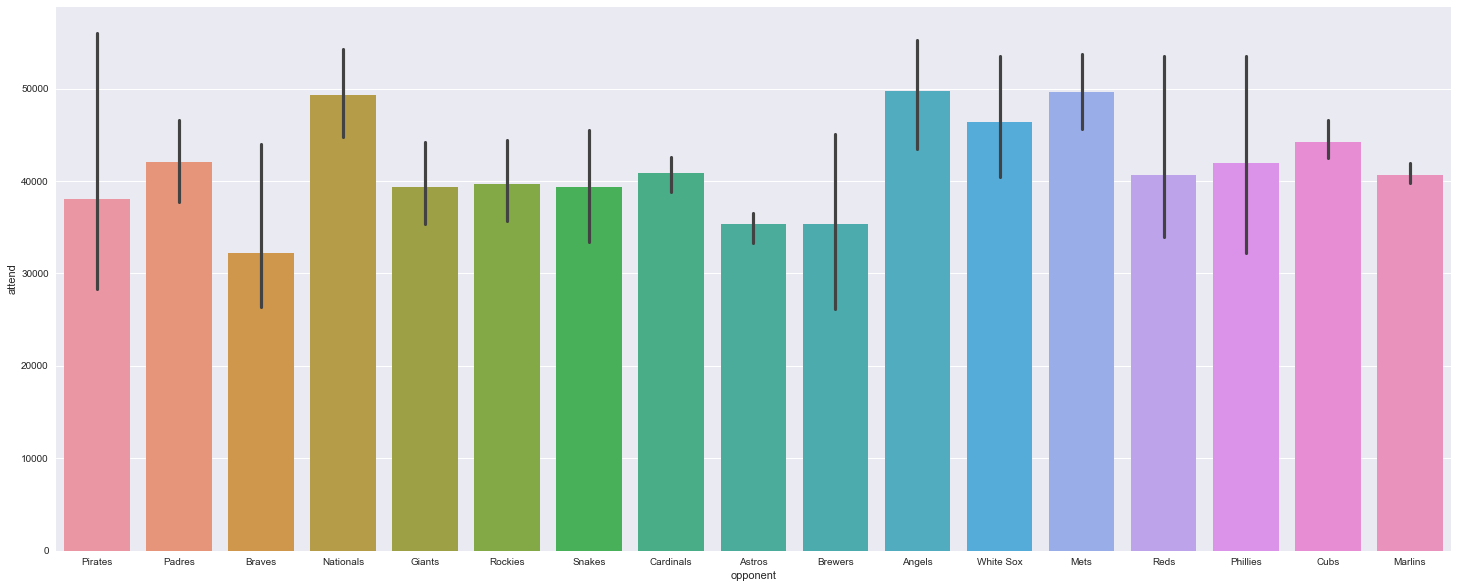

In [186]:
bp = sns.barplot('opponent', 'attend', data=dodgerDF)
bp.set_xlabel = ('Opponent')
bp.set_ylabel = ('Attendance')
bp.set_title = ('Attendance by Opponent')
plt.show()

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
fig_size[0] = 25
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size